In [71]:
'''
Alec K. Mattu
INST 414
07/02/2021

Project 2
'''

'\nAlec K. Mattu\nINST 414\n07/02/2021\n\nProject 2\n'

In [147]:
# Import the needed libraries
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import nltk
import string
import json
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from nltk.corpus import stopwords

# Part 0
## Pre-processing of songs

In [105]:
# Variable for songs
songs = []

# Open CSV and read each row into songs variable
with open('dataset_output.csv') as cvf:
    reader = csv.DictReader(cvf)
    for row in reader:
        # Tokenize lyrics, split words up
        tokenized = nltk.word_tokenize(row["lyrics"])
        no_stopwords = [w for w in tokenized if w not in stopwords.words("english")]
        row["lyrics_split"] = [w for w in no_stopwords if w not in string.punctuation]
        
        # Take tokenized words, strip non-unique instances
        freqdist = nltk.FreqDist(row["lyrics_split"])
        row["lyrics_split_unique"] = [word for word, freq in freqdist.items() if not word.isdigit()]

        # Count number of words in lyrics
        row["lyrics_count_unique"] = len(row["lyrics_split_unique"])
        row["lyrics_count"] = len(row["lyrics_split"])
        row["lyrics_count_ratio"] = row["lyrics_count_unique"] / row["lyrics_count"]
        
        # Add song to lyrics list
        songs.append(row)

In [106]:
# View list excerpt 
print(json.dumps(songs[3], indent = 2, sort_keys = True))

{
  "artist/band name": "Harry Belafonte",
  "lyrics": "Look, look at Dolly,\nPretty, pretty, pretty, pretty, pretty, pretty dolly\nOh here she come, here she come, here she come\nPretty, pretty Dolly\nWhen Dolly hear them sound the drum\nUp she jump she holler: \"Here I Come\"\nCause she gonna dance, she gonna sing\nShe gonna cause the rafters to ring\nCause she gonna dance, she gonna sing\nShe gonna cause the rafters to ring\nDon't stop her when she hear the call\nDolly Dawn goin' to have herself a ball\nWhen Dolly start to shake an shout\nClear the floor cause she really move about\nWhen Dolly go into a turn\nAll men jump and their eyes begin to burn\nSoon Dolly go into a fall\nTurn an' spin then she starts to climb the wall\nSoon Dolly go into a fall\nTurn an' spin and then she climb the wall",
  "lyrics url": "https://www.azlyrics.com/lyrics/harrybelafonte/dollydawn.html",
  "lyrics_count": 102,
  "lyrics_count_ratio": 0.5588235294117647,
  "lyrics_count_unique": 57,
  "lyrics_spl

In [107]:
# Turn the songs variable into a Pandas DF
df = pd.DataFrame(songs)

In [108]:
# Force year column to integer
df["year"] = pd.to_numeric(df["year"])

In [109]:
# View head/tail of dataframe
df

,song title,artist/band name,year,lyrics url,lyrics,lyrics_split,lyrics_split_unique,lyrics_count_unique,lyrics_count,lyrics_count_ratio
0,Shaking The Blues Away,Doris Day,1955,https://www.azlyrics.com/lyrics/dorisday/shaki...,There's an old superstition 'way down south\nE...,"[There, 's, old, superstition, 'way, south, Ev...","[There, 's, old, superstition, 'way, south, Ev...",57,81,0.703704
1,Mood Indigo,"Sinatra, Frank",1955,https://www.azlyrics.com/lyrics/franksinatra/m...,"You ain't been blue; no, no, no\nYou ain't bee...","[You, ai, n't, blue, You, ai, n't, blue, Till,...","[You, ai, n't, blue, Till, 've, mood, indigo, ...",46,63,0.730159
2,All Alone,Julie London,1956,https://www.azlyrics.com/lyrics/julielondon/al...,"All alone, I'm so all alone\nThere is no one e...","[All, alone, I, 'm, alone, There, one, else, A...","[All, alone, I, 'm, There, one, else, telephon...",16,26,0.615385
3,Dolly Dawn,Harry Belafonte,1956,https://www.azlyrics.com/lyrics/harrybelafonte...,"Look, look at Dolly,\nPretty, pretty, pretty, ...","[Look, look, Dolly, Pretty, pretty, pretty, pr...","[Look, look, Dolly, Pretty, pretty, dolly, Oh,...",57,102,0.558824
4,You're My Thrill,"Lee, Peggy",1956,https://www.azlyrics.com/lyrics/peggylee/youre...,"You're my thrill, you do something to me\nYou ...","[You, 're, thrill, something, You, send, chill...","[You, 're, thrill, something, send, chills, ri...",37,72,0.513889
...,...,...,...,...,...,...,...,...,...,...
495,You Dancy,Tommy Lee,2020,https://www.azlyrics.com/lyrics/tommylee/youda...,"I said, ""You have any drums in your house?""\nD...","[I, said, ``, You, drums, house, '', Damn, I, ...","[I, said, ``, You, drums, house, '', Damn, fee...",109,213,0.511737
496,I Just Love You,UPPERROOM,2020,https://www.azlyrics.com/lyrics/upperroom/ijus...,I just wanna move You\nWhat moves You?\nI just...,"[I, wan, na, move, You, What, moves, You, I, w...","[I, wan, na, move, You, What, moves, love, Lor...",26,264,0.098485
497,Cowgirl Blues (Mark Wystrach Vocal),Midland,2021,https://www.azlyrics.com/lyrics/midland/cowgir...,"So long, my hill country woman\nDon't cry\nBut...","[So, long, hill, country, woman, Do, n't, cry,...","[So, long, hill, country, woman, Do, n't, cry,...",66,153,0.431373
498,Lights On,"Blue Stones, The",2021,https://www.azlyrics.com/lyrics/bluestones/lig...,"I saw it from a distance, it came without a so...","[I, saw, distance, came, without, sound, I, co...","[I, saw, distance, came, without, sound, could...",56,124,0.451613


# 1A
## Plot the song length by production year

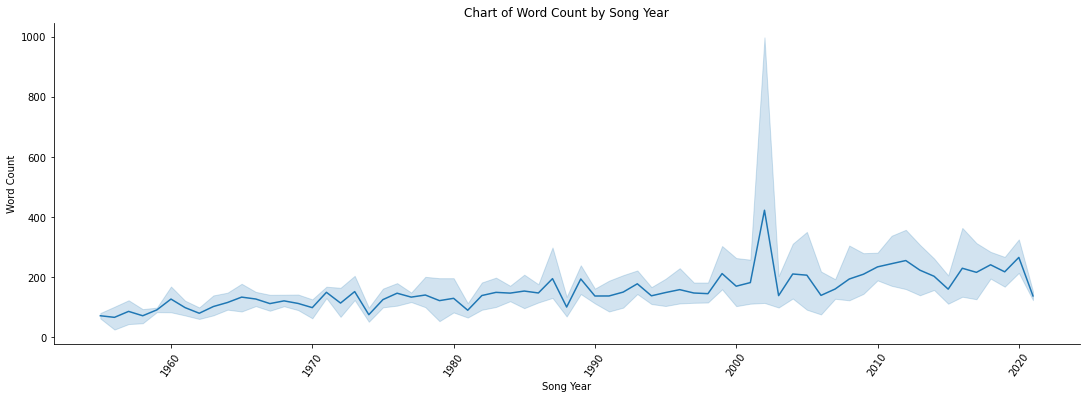

In [110]:
# Basic Rel Plot
sns.relplot(data = df, x = "year", y = "lyrics_count", kind = "line", aspect = 3)

# Add Rotation to X labels
locs, labels = plt.xticks()
plt.setp(labels, rotation = 55)

# Add X/Y Axis Labels
plt.title("Chart of Word Count by Song Year")
plt.xlabel("Song Year")
plt.ylabel("Word Count")

# Save Plot
plt.savefig("project2_fig1_117568813.pdf")

# Hide Output
None

In [149]:
print("Average song length " + str(math.floor(sum(df["lyrics_count"]) / len(df["lyrics_count"]))) + " words")

Average song length 168 words


In [151]:
print("Longest song length " + str(max(df["lyrics_count"])) + " words")

Longest song length 1836 words


# Part 1B
## Min-Max scaling and linear regression

In [111]:
# Sklearn Min-Max Scaler
scaler = MinMaxScaler()

# Make a dataframe clone
temp1 = df[["lyrics_count"]]

# Min-max scale lyrics_count 
temp1 = scaler.fit_transform(temp1[["lyrics_count"]])

# Pull scaled arrays out of temp1
temp2 = [w[0] for w in temp1]

# Convert array to dataframe
temp3 = pd.DataFrame(temp2)
temp3.columns = ["lyrics_count_scaled"]

# Join temp dataframe to song dataframe
df = df.join(temp3, on = 'lyrics_count', how = 'left')

In [112]:
# View new dataframe
df

,song title,artist/band name,year,lyrics url,lyrics,lyrics_split,lyrics_split_unique,lyrics_count_unique,lyrics_count,lyrics_count_ratio,lyrics_count_scaled
0,Shaking The Blues Away,Doris Day,1955,https://www.azlyrics.com/lyrics/dorisday/shaki...,There's an old superstition 'way down south\nE...,"[There, 's, old, superstition, 'way, south, Ev...","[There, 's, old, superstition, 'way, south, Ev...",57,81,0.703704,0.112807
1,Mood Indigo,"Sinatra, Frank",1955,https://www.azlyrics.com/lyrics/franksinatra/m...,"You ain't been blue; no, no, no\nYou ain't bee...","[You, ai, n't, blue, You, ai, n't, blue, Till,...","[You, ai, n't, blue, Till, 've, mood, indigo, ...",46,63,0.730159,0.045777
2,All Alone,Julie London,1956,https://www.azlyrics.com/lyrics/julielondon/al...,"All alone, I'm so all alone\nThere is no one e...","[All, alone, I, 'm, alone, There, one, else, A...","[All, alone, I, 'm, There, one, else, telephon...",16,26,0.615385,0.028338
3,Dolly Dawn,Harry Belafonte,1956,https://www.azlyrics.com/lyrics/harrybelafonte...,"Look, look at Dolly,\nPretty, pretty, pretty, ...","[Look, look, Dolly, Pretty, pretty, pretty, pr...","[Look, look, Dolly, Pretty, pretty, dolly, Oh,...",57,102,0.558824,0.054496
4,You're My Thrill,"Lee, Peggy",1956,https://www.azlyrics.com/lyrics/peggylee/youre...,"You're my thrill, you do something to me\nYou ...","[You, 're, thrill, something, You, send, chill...","[You, 're, thrill, something, send, chills, ri...",37,72,0.513889,0.040327
...,...,...,...,...,...,...,...,...,...,...,...
495,You Dancy,Tommy Lee,2020,https://www.azlyrics.com/lyrics/tommylee/youda...,"I said, ""You have any drums in your house?""\nD...","[I, said, ``, You, drums, house, '', Damn, I, ...","[I, said, ``, You, drums, house, '', Damn, fee...",109,213,0.511737,0.108992
496,I Just Love You,UPPERROOM,2020,https://www.azlyrics.com/lyrics/upperroom/ijus...,I just wanna move You\nWhat moves You?\nI just...,"[I, wan, na, move, You, What, moves, You, I, w...","[I, wan, na, move, You, What, moves, love, Lor...",26,264,0.098485,0.038147
497,Cowgirl Blues (Mark Wystrach Vocal),Midland,2021,https://www.azlyrics.com/lyrics/midland/cowgir...,"So long, my hill country woman\nDon't cry\nBut...","[So, long, hill, country, woman, Do, n't, cry,...","[So, long, hill, country, woman, Do, n't, cry,...",66,153,0.431373,0.023433
498,Lights On,"Blue Stones, The",2021,https://www.azlyrics.com/lyrics/bluestones/lig...,"I saw it from a distance, it came without a so...","[I, saw, distance, came, without, sound, I, co...","[I, saw, distance, came, without, sound, could...",56,124,0.451613,0.053406


In [113]:
# Linear regression values
x = df["year"].values.reshape(-1, 1)
x = np.nan_to_num(x) # Replace NaN with 0
y = df["lyrics_count_scaled"].values.reshape(-1, 1)
y = np.nan_to_num(y) # Replace NaN with 0

In [114]:
# Basic linear model
model = linear_model.LinearRegression()

# Split data into training values
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25)

# Create training model
model.fit(xtrain, ytrain)

# Show test
ypred_test = model.predict(xtest)

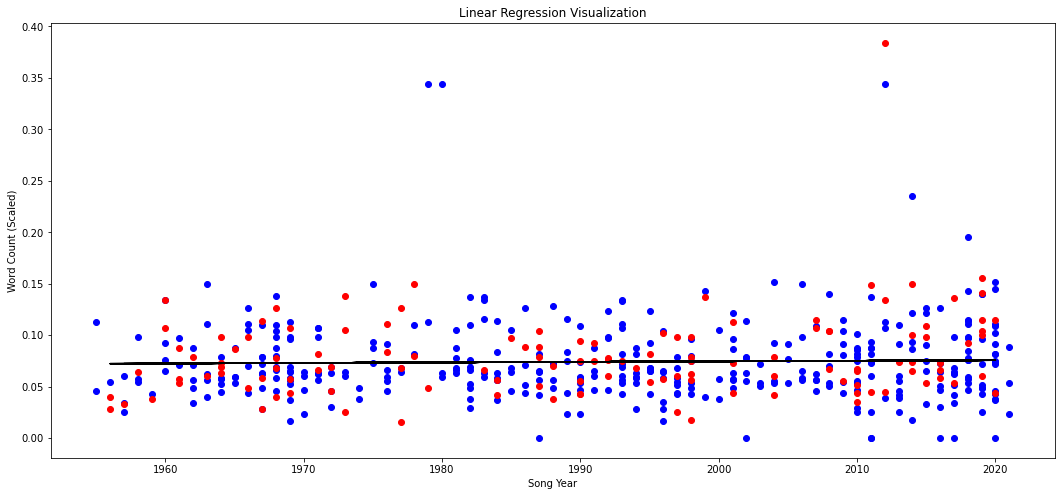

In [115]:
# Show plot
plt.figure(figsize = (18, 8))
plt.scatter(xtrain, ytrain, c = "blue") # Training data
plt.scatter(xtest, ytest, c = "red") # Testing data
plt.plot(xtest, ypred_test, c = "black")

# Add labels
plt.title("Linear Regression Visualization")
plt.xlabel("Song Year")
plt.ylabel("Word Count (Scaled)")

# Hide output
None

In [116]:
mean_squared_error = metrics.mean_squared_error(ytest, ypred_test)
print("Model Mean-Squared-Error: " + str(mean_squared_error))

Model Mean-Squared-Error: 0.0017239498963096686


In [117]:
r2 = metrics.r2_score(ytest, ypred_test)
print("Model R2 Score: " + str(r2))

Model R2 Score: -0.00551069132124149


# 2A
## Plot the unique song word count by production year

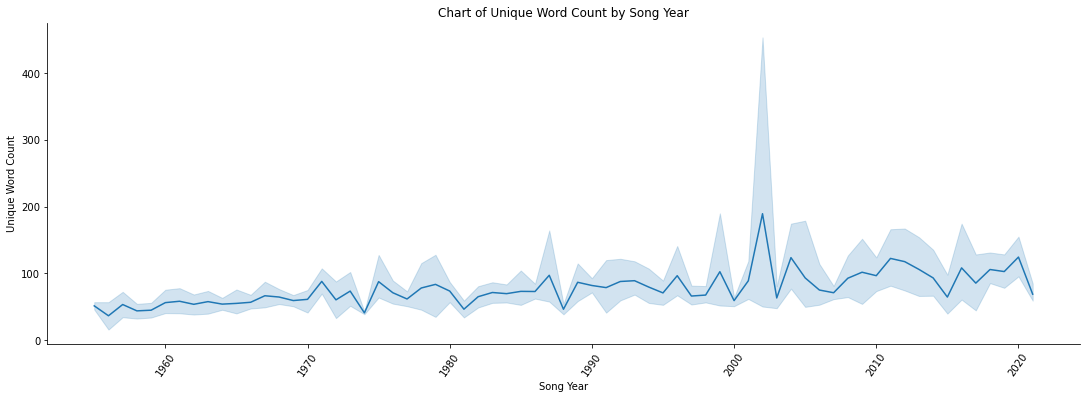

In [118]:
# Basic Rel Plot
sns.relplot(data = df, x = "year", y = "lyrics_count_unique", kind = "line", aspect = 3)

# Add Rotation to X labels
locs, labels = plt.xticks()
plt.setp(labels, rotation = 55)

# Add X/Y Axis Labels
plt.title("Chart of Unique Word Count by Song Year")
plt.xlabel("Song Year")
plt.ylabel("Unique Word Count")

# Save plot
plt.savefig("project2_fig2_117568813.pdf")

# Hide Output
None

In [154]:
print("Average unique song length " + str(math.floor(sum(df["lyrics_count_unique"]) / len(df["lyrics_count_unique"]))) + " words")

Average unique song length 82 words


In [155]:
print("Longest unique word song length " + str(max(df["lyrics_count_unique"])) + " words")

Longest unique word song length 845 words


# Part 2B
## Min-Max scaling and linear regression

In [119]:
# Sklearn Min-Max Scaler
scaler = MinMaxScaler()

# Make a dataframe clone
temp1 = df[["lyrics_count_unique"]]

# Min-max scale lyrics_count 
temp1 = scaler.fit_transform(temp1[["lyrics_count_unique"]])

# Pull scaled arrays out of temp1
temp2 = [w[0] for w in temp1]

# Convert array to dataframe
temp3 = pd.DataFrame(temp2)
temp3.columns = ["lyrics_count_unique_scaled"]

# Join temp dataframe to song dataframe
df = df.join(temp3, on = 'lyrics_count_unique', how = 'left')

In [120]:
# View new dataframe
df

,song title,artist/band name,year,lyrics url,lyrics,lyrics_split,lyrics_split_unique,lyrics_count_unique,lyrics_count,lyrics_count_ratio,lyrics_count_scaled,lyrics_count_unique_scaled
0,Shaking The Blues Away,Doris Day,1955,https://www.azlyrics.com/lyrics/dorisday/shaki...,There's an old superstition 'way down south\nE...,"[There, 's, old, superstition, 'way, south, Ev...","[There, 's, old, superstition, 'way, south, Ev...",57,81,0.703704,0.112807,0.053318
1,Mood Indigo,"Sinatra, Frank",1955,https://www.azlyrics.com/lyrics/franksinatra/m...,"You ain't been blue; no, no, no\nYou ain't bee...","[You, ai, n't, blue, You, ai, n't, blue, Till,...","[You, ai, n't, blue, Till, 've, mood, indigo, ...",46,63,0.730159,0.045777,0.068720
2,All Alone,Julie London,1956,https://www.azlyrics.com/lyrics/julielondon/al...,"All alone, I'm so all alone\nThere is no one e...","[All, alone, I, 'm, alone, There, one, else, A...","[All, alone, I, 'm, There, one, else, telephon...",16,26,0.615385,0.028338,0.120853
3,Dolly Dawn,Harry Belafonte,1956,https://www.azlyrics.com/lyrics/harrybelafonte...,"Look, look at Dolly,\nPretty, pretty, pretty, ...","[Look, look, Dolly, Pretty, pretty, pretty, pr...","[Look, look, Dolly, Pretty, pretty, dolly, Oh,...",57,102,0.558824,0.054496,0.053318
4,You're My Thrill,"Lee, Peggy",1956,https://www.azlyrics.com/lyrics/peggylee/youre...,"You're my thrill, you do something to me\nYou ...","[You, 're, thrill, something, You, send, chill...","[You, 're, thrill, something, send, chills, ri...",37,72,0.513889,0.040327,0.066351
...,...,...,...,...,...,...,...,...,...,...,...,...
495,You Dancy,Tommy Lee,2020,https://www.azlyrics.com/lyrics/tommylee/youda...,"I said, ""You have any drums in your house?""\nD...","[I, said, ``, You, drums, house, '', Damn, I, ...","[I, said, ``, You, drums, house, '', Damn, fee...",109,213,0.511737,0.108992,0.110190
496,I Just Love You,UPPERROOM,2020,https://www.azlyrics.com/lyrics/upperroom/ijus...,I just wanna move You\nWhat moves You?\nI just...,"[I, wan, na, move, You, What, moves, You, I, w...","[I, wan, na, move, You, What, moves, love, Lor...",26,264,0.098485,0.038147,0.034360
497,Cowgirl Blues (Mark Wystrach Vocal),Midland,2021,https://www.azlyrics.com/lyrics/midland/cowgir...,"So long, my hill country woman\nDon't cry\nBut...","[So, long, hill, country, woman, Do, n't, cry,...","[So, long, hill, country, woman, Do, n't, cry,...",66,153,0.431373,0.023433,0.118483
498,Lights On,"Blue Stones, The",2021,https://www.azlyrics.com/lyrics/bluestones/lig...,"I saw it from a distance, it came without a so...","[I, saw, distance, came, without, sound, I, co...","[I, saw, distance, came, without, sound, could...",56,124,0.451613,0.053406,0.086493


In [121]:
# Linear regression values
x = df["year"].values.reshape(-1, 1)
x = np.nan_to_num(x) # Replace NaN with 0
y = df["lyrics_count_unique_scaled"].values.reshape(-1, 1)
y = np.nan_to_num(y) # Replace NaN with 0

In [122]:
# Basic linear model
model = linear_model.LinearRegression()

# Split data into training values
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25)

# Create training model
model.fit(xtrain, ytrain)

# Show test
ypred_test = model.predict(xtest)

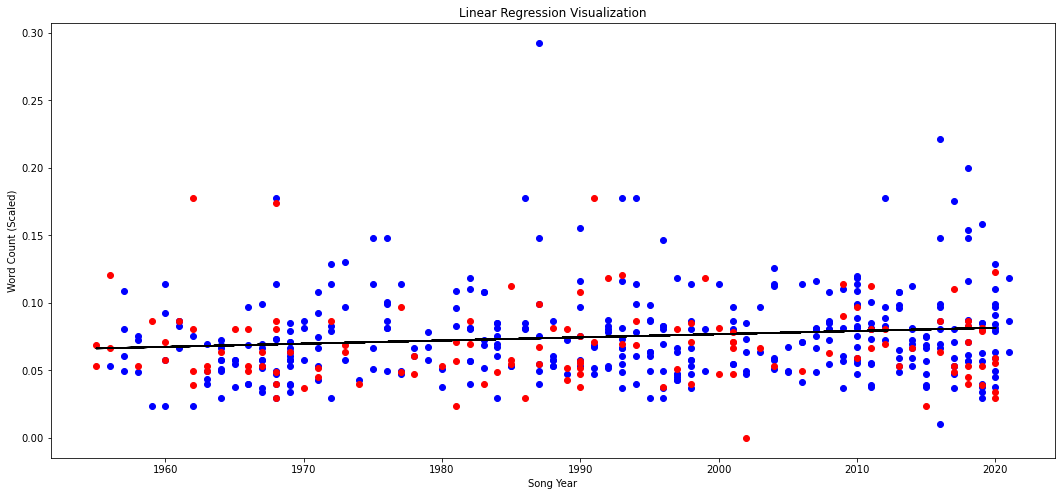

In [123]:
# Show plot
plt.figure(figsize = (18, 8))
plt.scatter(xtrain, ytrain, c = "blue") # Training data
plt.scatter(xtest, ytest, c = "red") # Testing data
plt.plot(xtest, ypred_test, c = "black")

# Add labels
plt.title("Linear Regression Visualization")
plt.xlabel("Song Year")
plt.ylabel("Word Count (Scaled)")

# Hide output
None

In [124]:
mean_squared_error = metrics.mean_squared_error(ytest, ypred_test)
print("Model Mean-Squared-Error: " + str(mean_squared_error))

Model Mean-Squared-Error: 0.0008740560450238422


In [125]:
r2 = metrics.r2_score(ytest, ypred_test)
print("Model R2 Score: " + str(r2))

Model R2 Score: -0.08350865207889657


# 3A
## Number of unique words to words

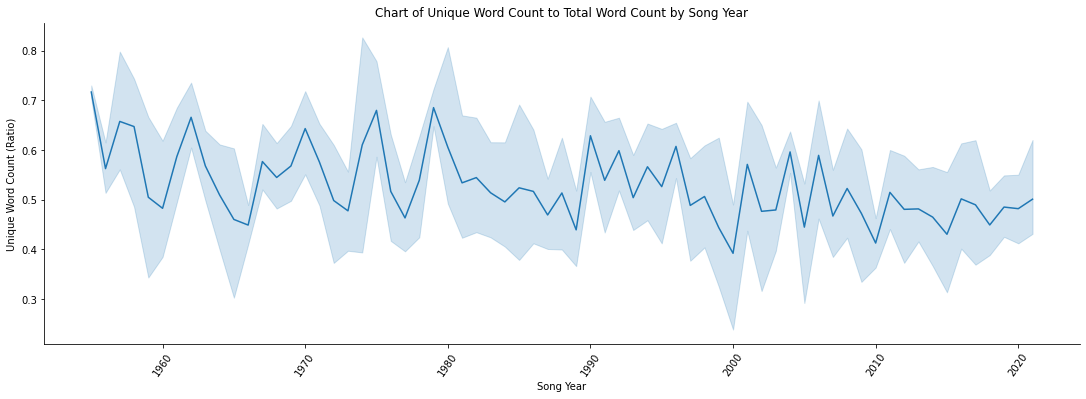

In [126]:
# Basic Rel Plot
sns.relplot(data = df, x = "year", y = "lyrics_count_ratio", kind = "line", aspect = 3)

# Add Rotation to X labels
locs, labels = plt.xticks()
plt.setp(labels, rotation = 55)

# Add X/Y Axis Labels
plt.title("Chart of Unique Word Count to Total Word Count by Song Year")
plt.xlabel("Song Year")
plt.ylabel("Unique Word Count (Ratio)")

# Save plot
plt.savefig("project2_fig3_117568813.pdf")

# Hide Output
None

# Part 3B
## Min-Max scaling and linear regression

In [127]:
# Sklearn Min-Max Scaler
scaler = MinMaxScaler()

# Make a dataframe clone
temp1 = df[["lyrics_count_ratio"]]

# Min-max scale lyrics_count 
temp1 = scaler.fit_transform(temp1[["lyrics_count_ratio"]])

# Pull scaled arrays out of temp1
temp2 = [w[0] for w in temp1]

# Convert array to dataframe
temp3 = pd.DataFrame(temp2)
temp3.columns = ["lyrics_count_ratio_scaled"]

# Join temp dataframe to song dataframe
df = df.join(temp3, on = 'lyrics_count_ratio', how = 'left')

/home/nachfolger/.local/lib/python3.8/site-packages/pandas/core/reshape/merge.py:1113: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


In [128]:
# View new dataframe
df

,song title,artist/band name,year,lyrics url,lyrics,lyrics_split,lyrics_split_unique,lyrics_count_unique,lyrics_count,lyrics_count_ratio,lyrics_count_scaled,lyrics_count_unique_scaled,lyrics_count_ratio_scaled
0,Shaking The Blues Away,Doris Day,1955,https://www.azlyrics.com/lyrics/dorisday/shaki...,There's an old superstition 'way down south\nE...,"[There, 's, old, superstition, 'way, south, Ev...","[There, 's, old, superstition, 'way, south, Ev...",57,81,0.703704,0.112807,0.053318,NaN
1,Mood Indigo,"Sinatra, Frank",1955,https://www.azlyrics.com/lyrics/franksinatra/m...,"You ain't been blue; no, no, no\nYou ain't bee...","[You, ai, n't, blue, You, ai, n't, blue, Till,...","[You, ai, n't, blue, Till, 've, mood, indigo, ...",46,63,0.730159,0.045777,0.068720,NaN
2,All Alone,Julie London,1956,https://www.azlyrics.com/lyrics/julielondon/al...,"All alone, I'm so all alone\nThere is no one e...","[All, alone, I, 'm, alone, There, one, else, A...","[All, alone, I, 'm, There, one, else, telephon...",16,26,0.615385,0.028338,0.120853,NaN
3,Dolly Dawn,Harry Belafonte,1956,https://www.azlyrics.com/lyrics/harrybelafonte...,"Look, look at Dolly,\nPretty, pretty, pretty, ...","[Look, look, Dolly, Pretty, pretty, pretty, pr...","[Look, look, Dolly, Pretty, pretty, dolly, Oh,...",57,102,0.558824,0.054496,0.053318,NaN
4,You're My Thrill,"Lee, Peggy",1956,https://www.azlyrics.com/lyrics/peggylee/youre...,"You're my thrill, you do something to me\nYou ...","[You, 're, thrill, something, You, send, chill...","[You, 're, thrill, something, send, chills, ri...",37,72,0.513889,0.040327,0.066351,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,You Dancy,Tommy Lee,2020,https://www.azlyrics.com/lyrics/tommylee/youda...,"I said, ""You have any drums in your house?""\nD...","[I, said, ``, You, drums, house, '', Damn, I, ...","[I, said, ``, You, drums, house, '', Damn, fee...",109,213,0.511737,0.108992,0.110190,NaN
496,I Just Love You,UPPERROOM,2020,https://www.azlyrics.com/lyrics/upperroom/ijus...,I just wanna move You\nWhat moves You?\nI just...,"[I, wan, na, move, You, What, moves, You, I, w...","[I, wan, na, move, You, What, moves, love, Lor...",26,264,0.098485,0.038147,0.034360,NaN
497,Cowgirl Blues (Mark Wystrach Vocal),Midland,2021,https://www.azlyrics.com/lyrics/midland/cowgir...,"So long, my hill country woman\nDon't cry\nBut...","[So, long, hill, country, woman, Do, n't, cry,...","[So, long, hill, country, woman, Do, n't, cry,...",66,153,0.431373,0.023433,0.118483,NaN
498,Lights On,"Blue Stones, The",2021,https://www.azlyrics.com/lyrics/bluestones/lig...,"I saw it from a distance, it came without a so...","[I, saw, distance, came, without, sound, I, co...","[I, saw, distance, came, without, sound, could...",56,124,0.451613,0.053406,0.086493,NaN


In [134]:
# Linear regression values
x = df["year"].values.reshape(-1, 1)
x = np.nan_to_num(x) # Replace NaN with 0
y = df["lyrics_count_ratio_scaled"].values.reshape(-1, 1)
y = np.nan_to_num(y) # Replace NaN with 0

In [135]:
# Basic linear model
model = linear_model.LinearRegression()

# Split data into training values
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25)

# Create training model
model.fit(xtrain, ytrain)

# Show test
ypred_test = model.predict(xtest)

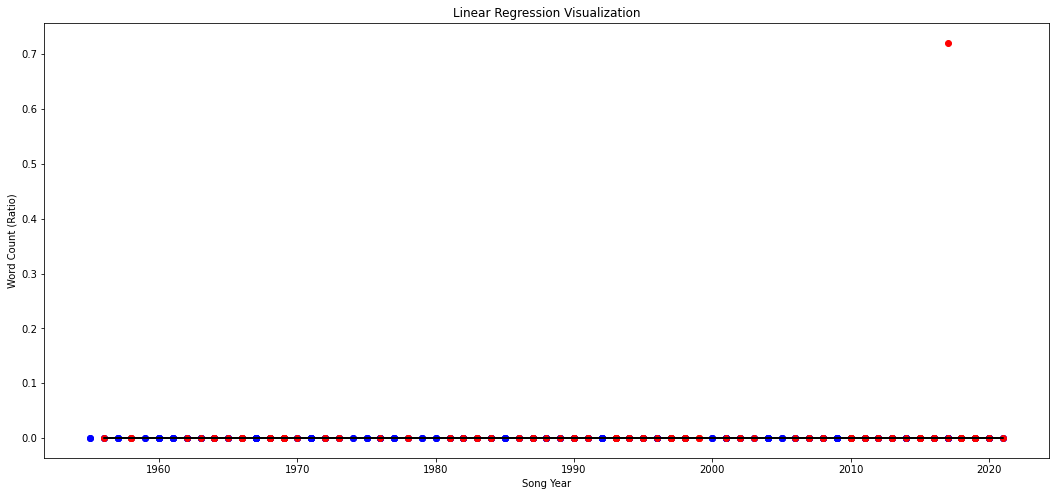

In [136]:
# Show plot
plt.figure(figsize = (18, 8))
plt.scatter(xtrain, ytrain, c = "blue") # Training data
plt.scatter(xtest, ytest, c = "red") # Testing data
plt.plot(xtest, ypred_test, c = "black")

# Add labels
plt.title("Linear Regression Visualization")
plt.xlabel("Song Year")
plt.ylabel("Word Count (Ratio)")

# Hide output
None

In [137]:
mean_squared_error = metrics.mean_squared_error(ytest, ypred_test)
print("Model Mean-Squared-Error: " + str(mean_squared_error))

Model Mean-Squared-Error: 0.004157655561211635


In [138]:
r2 = metrics.r2_score(ytest, ypred_test)
print("Model R2 Score: " + str(r2))

Model R2 Score: -0.008064516129033361
